# PART 1

## Python Coding and Data Set

Load in the data file and header file provided The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [1]:
# import required libraries and define parameters
# TODO: consider replacing hard-coded parameters with config file
import pandas as pd
import numpy as np
import csv
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
from sklearn import preprocessing, datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, f_classif
import warnings
warnings.filterwarnings("ignore")

csv_filename = "breast-cancer.csv"
head_file = "field_names.txt"

In [2]:
# read the text file containing the header files
head_file_obj = open(head_file, 'r')
head_file_raw_list = head_file_obj.readlines()
head_file_obj.close()
# use list comprehension to remove line feeds from list
head_file_list = [item.replace("\n","") for item in head_file_raw_list]
print("here is the head_file_list "+str(head_file_list))

here is the head_file_list ['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [3]:
# read the csv file into a dataframe and incorporate head_file_list as the headers for the dataframe
df = pd.read_csv(csv_filename,names = head_file_list)
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Comment on any steps you might take to evaluate or transform the dataset.

#### Evaluate The Dataset

When I look at the data, I see that the column names don't match the data. This is evident since the worst results usually differ significantly from the mean values for the same variable. For example, the first row has texture_mean = 1001.0, but texture_worst = 0.27760. Given the low standard error, it doesn't make sense that the worst figure is so much smaller than the mean. If I were dealing with this issue in the real world, the first thing I'd do is double-check that the column heads are actually in the correct sequence in relation to the data.

In [4]:
def normalize_df(df):
    '''given a dataframe, normalize by column - from https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame'''
    col_names = list(df) # save column names
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler() # define scaling transform
    x_scaled = min_max_scaler.fit_transform(x) # fit scaling transform
    df = pd.DataFrame(x_scaled, columns = col_names) # transform normalized columns back into a dataframe
    return(df)

In [5]:
# get various summary statistics, excluding NaN values
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df['smoothness_mean'].describe()

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: smoothness_mean, dtype: float64

In [7]:
# get the count per diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Compute the mean and median smoothness and compactness for benign and malignant tumors

### Mean Smoothness and Median Smoothness

In [8]:
print("Mean smoothness (benign (0) and malignant (1) ): ")
smooth_mean = df.groupby("diagnosis")["smoothness_mean"].mean()
print(smooth_mean)
print("="*60)
print("Median smoothness (benign (0) and malignant (1) ): ")
smooth_median = df.groupby("diagnosis")["smoothness_mean"].median()
print(smooth_median)

Mean smoothness (benign (0) and malignant (1) ): 
diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64
Median smoothness (benign (0) and malignant (1) ): 
diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64


### Mean Compactness and Median Compactness

In [9]:
print("Mean compactness (benign (0) and malignant (1) ): ")
compactness_mean = df.groupby("diagnosis")["compactness_mean"].mean()
print(compactness_mean)
print("="*60)
print("Median compactness (benign (0) and malignant (1) ): ")
compactness_median = df.groupby("diagnosis")["compactness_mean"].median()
print(compactness_median)

Mean compactness (benign (0) and malignant (1) ): 
diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64
Median compactness (benign (0) and malignant (1) ): 
diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64


## Bootstrap Function

#The following function can create several bootstrap samples from a given dataframe, df #It can be adjusted so that the sampling is stratified def boot

In [10]:
# Write a function to generate bootstrap samples of the data
# draw n samples with replacement

def generate_bootstrap(data_frame, n):
  sample_with_replacement = data_frame.sample(n=n,replace=True)
  return sample_with_replacement

print("Dataset 1:")
print(generate_bootstrap(df, 5)) 
print("Dataset 2:")
print(generate_bootstrap(df, 5)) 
print("Dataset 3:")
print(generate_bootstrap(df, 5)) 

Dataset 1:
           ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
361    901041         B       13.300            21.57         85.24   
342     89827         B       11.060            14.96         71.49   
87   86135502         M       19.020            24.59        122.00   
61     858981         B        8.598            20.98         54.66   
49     857156         B       13.490            22.30         86.91   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
361         546.1           0.08582        0.06373         0.03344   
342         373.9           0.10330        0.09097         0.05397   
87         1076.0           0.09029        0.12060         0.14680   
61          221.8           0.12430        0.08963         0.03000   
49          561.0           0.08752        0.07698         0.04751   

     perimeter_sd_error  ...  concavity_worst  concave_points_mean  \
361            0.024240  ...           14.200                29.20   
3

# Exploratory Analysis

In [11]:
# encoding 'diagnosis' feature as 0/1
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis']=le.transform(df['diagnosis'])

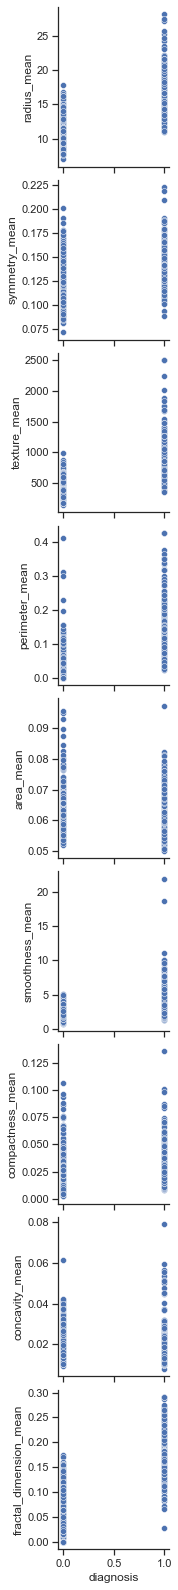

In [12]:
#import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, x_vars=['diagnosis'], y_vars=['radius_mean','symmetry_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'fractal_dimension_mean'])

##### Based on distribution plots it's obvious that some features are more effective on classification of the label. For example "fractal_distribution_mean" distribtions for two diffrent label classes (0 and 1) are well separated

### According to the distribition plots, some features that are predictive of a malignant tumor:

fractal_dimension_mean texture_mean radius_mean perimeter_mean smoothness_mean

<AxesSubplot:>

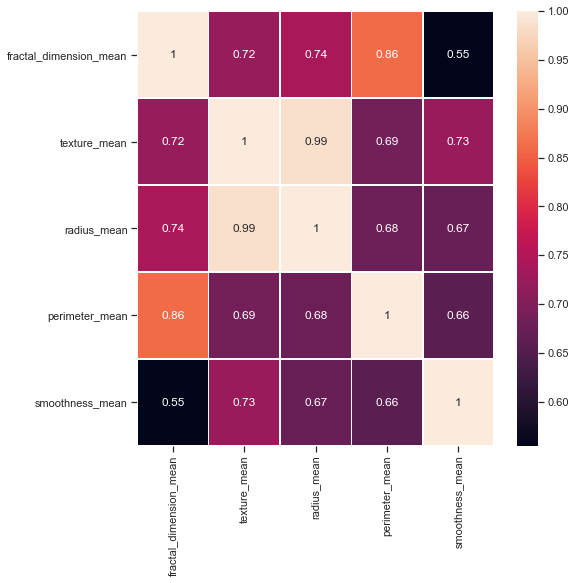

In [13]:
# Checking the correlation between the predictive variables
predictive = ['fractal_dimension_mean', 'texture_mean', 'radius_mean', 'perimeter_mean', 'smoothness_mean']
df_predictive = df[predictive]

# calculate the correlation matrix
corr_mat = df_predictive.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, linewidths=.5, ax=ax)

In [14]:
def num_of_outlier(data_frame, feature):
  Q1 = data_frame[feature].quantile(0.25)
  Q3 = data_frame[feature].quantile(0.75)
  IQR = Q3 - Q1
  outlier = (data_frame[feature] < (Q1 - 1.5 * IQR)) |(data_frame[feature] > (Q3 + 1.5 * IQR))
  num = sum(outlier)
  return num

print("Number of outliers for the feature {} is {}".format('fractal_dimension_mean', num_of_outlier(df, 'fractal_dimension_mean')))
print("Number of outliers for the feature {} is {}".format('radius_mean', num_of_outlier(df, 'radius_mean')))
print("Number of outliers for the feature {} is {}".format('perimeter_mean', num_of_outlier(df, 'perimeter_mean')))
print("Number of outliers for the feature {} is {}".format('smoothness_mean', num_of_outlier(df, 'smoothness_mean')))

Number of outliers for the feature fractal_dimension_mean is 0
Number of outliers for the feature radius_mean is 14
Number of outliers for the feature perimeter_mean is 18
Number of outliers for the feature smoothness_mean is 38


##### Based on the Number of outlier the best important features are 1-fractal_dimension_mean 2-radius_mean 3-perimeter_mean 4-smoothness_mean

<AxesSubplot:xlabel='fractal_dimension_mean'>

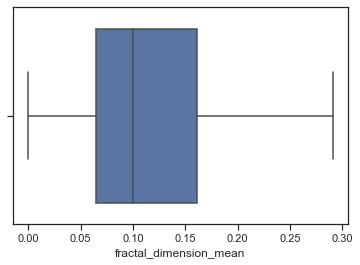

In [15]:
sns.boxplot(x=df['fractal_dimension_mean'])

<AxesSubplot:xlabel='radius_mean'>

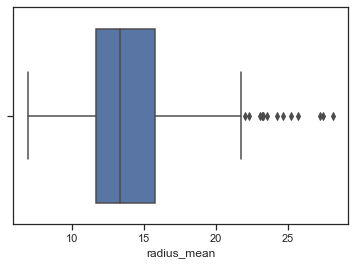

In [16]:
sns.boxplot(x=df["radius_mean"])

<AxesSubplot:xlabel='perimeter_mean'>

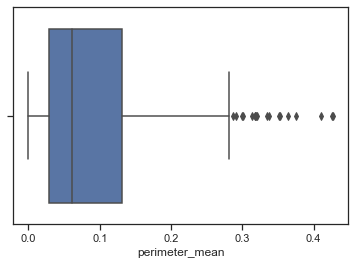

In [17]:
sns.boxplot(x=df['perimeter_mean'])

<AxesSubplot:xlabel='smoothness_mean'>

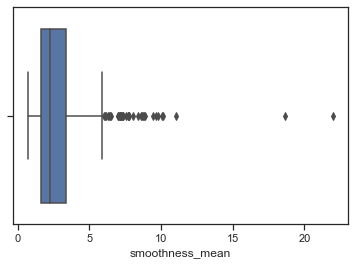

In [18]:
sns.boxplot(x=df['smoothness_mean'])

# Modeling

In [19]:
# Check distribution of diagnosis
print(df.diagnosis.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


### Preprocessing

In [20]:
X = df.drop(["diagnosis", "texture_mean", "ID"], axis = 1)
y = df["diagnosis"]

In [21]:
# Split the data to train and test
from sklearn.model_selection import train_test_split

seed = 0 # the experiments can be replicated

# 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# changing to data frame
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

### Random Forest Classifier

Gridsearch is used to select the hyperparameters that produce the best crossvalidation results. This enables us to select hyperparameters that perform well on the test data, reducing overfitting.

In [23]:
from sklearn.model_selection import ParameterGrid 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

param = {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 0, 'verbose': 0}

rf = RandomForestClassifier(**param)
rf.fit(X_train, y_train)  # training stage

print("Performance (test set): \n")

y_pre = rf.predict(X_test) # predictions
y_pro = rf.predict_proba(X_test)[:, 1]

y_pre_train = rf.predict(X_train) # predictions
y_pro_train = rf.predict_proba(X_train)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pre))

print("\nPerformance (train set): \n")

print("AUC Score : %.4f" % roc_auc_score(y_train, y_pro_train))
print("Accuracy : %.4f \n" % accuracy_score(y_train, y_pre_train))

print("Report of metrics on the test set:\n")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pre)))

Performance (test set): 

AUC Score : 0.9790
Accuracy : 0.9386 


Performance (train set): 

AUC Score : 0.9979
Accuracy : 0.9824 

Report of metrics on the test set:

Accuracy score: 0.9385964912280702


##### Identify the most important predictive variables and explain how you identified them

See below, where features are sorted by importance

Text(0.5, 1.0, 'The Most Important Features')

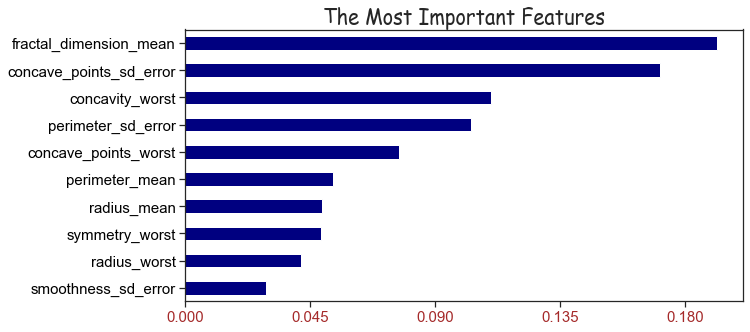

In [24]:
# The most important features
n = 10 # top 10 features
pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh', figsize=[10, 10/2], color='navy').invert_yaxis()    #  important feature in descending order
ticks_x = np.linspace(0, 0.18, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='brown')
plt.yticks(size=15, color='black' )
plt.title('The Most Important Features', family='fantasy', size=20)

The most essential features appear at the tops of trees, while the bottoms of trees are less important.

Overfitting in Random Forest can be controlled by the number of trees and the amount of features picked at random to create each tree from bootstrapped data.

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis'],axis=1),
                                                    df['diagnosis'], test_size=0.30, random_state=301)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=10.0**-2,solver='liblinear')
logmodel.fit(X_train_std,y_train)
predictions = logmodel.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



In [26]:
#### Avoid overfitting by choosing the regularlization parameter that does best on the test data

import numpy as np

regularizationParam, auc, log_loss_difference = [], [], []

from sklearn.metrics import roc_auc_score

for c in np.arange(-5, 5):
    logmodel = LogisticRegression(C=10.0**c, random_state=0,solver='liblinear')
    logmodel.fit(X_train_std, y_train)
    regularizationParam = np.append(regularizationParam,c)
    auc = np.append(auc,roc_auc_score(y_test,logmodel.predict_proba(X_test_std)[:,1]))

The graph below shows the highest auc on the test data with a regularization parameter of c = -2. We look at the auc on the test data rather than the training data, because a high AUC on the test data could be due to overfitting. By looking at the test data, we see the AUC on data the model wasn't exposed to when we fit the model.

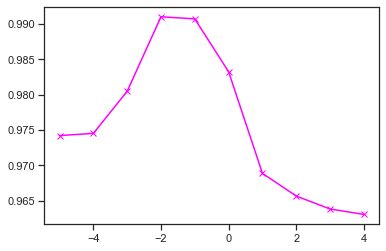

In [27]:
import matplotlib.pyplot as plt
plt.plot(regularizationParam, auc, color='magenta', marker='x', label='mylabel')

##### Evaluating Model Fit by Displaying a confusion matrix

In [28]:
logmodel = LogisticRegression(C=10.0**-2, random_state=0,solver='liblinear')
logmodel.fit(X_train_std, y_train)
predictions = logmodel.predict(X_test_std)
confusion_matrix(y_test, predictions)

array([[111,   2],
       [  5,  53]])

In [29]:
#### Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



##### In each model, identify the most important predictive variables and explain how you identified them.

Based on the absolute value of the coefficients, convavity_worst, concave_points_std_error, and fractal_dimension_mean are the three most important variables. Not surprisingly, the ID label is of low importance - this should just be a random ordering of the observations, so it would be surprising if it were predictive.

Full list of coeifficients sorted by importance below.

In [30]:
coef_df = pd.DataFrame({'label': X_test.columns, 'abs coef': abs(logmodel.coef_[0]), 'coef': logmodel.coef_[0], 'odds ratio': np.exp(logmodel.coef_[0])}, columns=['label', 'abs coef', 'coef', 'odds ratio'])
coef_df.sort_values(by=['abs coef'], ascending=False)

,label,abs coef,coef,odds ratio
21,concavity_worst,0.230914,0.230914,1.259750
23,concave_points_sd_error,0.223046,0.223046,1.249879
28,fractal_dimension_mean,0.218217,0.218217,1.243857
24,concave_points_worst,0.210356,0.210356,1.234117
8,perimeter_sd_error,0.209471,0.209471,1.233026
1,radius_mean,0.205206,0.205206,1.227778
3,radius_worst,0.203965,0.203965,1.226255
4,texture_mean,0.197671,0.197671,1.218562
22,concave_points_mean,0.183726,0.183726,1.201687
11,area_sd_error,0.178114,0.178114,1.194961


# Technical Audiences

Limitations of this analysis include:

* Limited actions to reduce overfitting
* Small dataset size
* no insight into how the data was collected or how the results of the model are going to be used. While the accuracy, especially for logistic regression, is good, we need to know how the results are going to be used in order to have high confidence of the adequacy of the model
* limited graphical analysis (ran out of time)
* no subject matter expert available to (a) explain the meanings of the columns (b) explain the methodology used to collect the data. In the absence of a subject matter expert a data scientist will always be vulnerable

Potential Improvements:

* additional approaches to reducing overfitting, including a bigger test set and ensemble testing.
* incorporate more graphical elements (for both the analysis of the raw data and explaining the results).
* more comprehensive analysis of which factors are correlated to malignancy and which factors influence the model outcomes. Ran out of time to explore this aspect more completely

# Non-Technical Audiences

##### Executive summary:

We used an input dataset of about breast cancer records, each of which had details on a tumour. Each record indicated whether the tumour was benign or malignant and also contained 30 features (additional pieces of information about each tumour). Our goal was to determine whether we could use this input dataset to create a predictive machine learning model that when given a set of features for a tumour could predict whether or not the tumour would be malignant.

To start, we analyzed the input dataset to determine its size and to ensure it did not contain anomalies that would cause problems (such as missing values or values with greatly varying scales). Next, we applied techniques to understand which of the features was correlated with the tumour being malignant. Then we applied a subset of the input dataset to two machine learning techniques to get trained models that predict whether a tumour is malignant or not given a set of information about the tumour.

Once we had the trained models, we took the other subset of the input dataset (the part that had not been used to train the models) and had the models make predictions about whether the tumours from that subset were malignant. By comparing these predictions with the actual malignance information for these tumours, we got measurements of the accuracy of the models.

Using the machine learning tenchniques we can predict malignant vs benign tumor. We have used two classification methods. our models takes different input features like radius_mean, area_mean, symmetry_mean and identifies (diagnose) malignant vs benign tumor. In our prediction, we can reach to 97% accuracy.

# PART 2

## Student 1

CODE

* Train_test_split has been imported but not used
* LinearRegression needs to be imported from sklearn.linear_model
* Data loaded into d dataframe but used as data
* Cv=1 in cross_val_score
* divide your code up into individual cells. For example, one cell for imports, one cell for data ingestion, one cell for model training, etc.
* lines 20 & 21 - it's a good idea to put all the imports in one place to keep your code from getting cluttered

METHODOLOGY

* Data should be evaluated for missing values.
* There should be a check for correlated features.
* you will save time for yourself if you begin by exploring the CSV file in Excel - see which columns are categorical (e.g. ContractTime, ContractType) continuous (e.g. SalaryNormalized) and free-form (e.g. Title).
* next, apply the model in simplest way possible, assess the accuracy, and determine which input variables have the biggest impact

CONCEPTUAL UNDERSTANDING

* Python concept is need to review as there is redundancy in the code
* The student needs to review concept of cross validation
* this student did not have enough Python skill to get a clear idea of what they understood conceptually. 

## Student 2

CODE

* divide your code up into individual cells. For example, one cell for imports, one cell for data ingestion, one cell for model training, etc.
* line 9 - filename is incorrect
* comments could be more meaningful
* X should be a data frame to be used on cross validation

METHODOLOGY

* No explaratory data analysis
* There is no feature engineering/scaling
* start your notebook with a quick summary of the overall goal - what will your finished project do? Also list assumptions
* next, explain which model you want to use. For example, if you think linear regression (to predict a continuous value) is the correct model, put in a comments explaining why
* you will save time for yourself if you begin by exploring the CSV file in Excel - see which columns are categorical (e.g. ContractTime, ContractType) continuous (e.g. SalaryNormalized) and free-form (e.g. Title)

CONCEPTUAL UNDERSTANDING

* This student understands Python better - At the very least, his code ran without errors and required fewer corrections.
* the student chose a column in the original dataset that is mostly missing values to attempt to correlate to another column, so the end result is not useful
* The student needs to review concept of cross validation